In [1]:
#  Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

___
Enter Team Member Names here (*double click to edit*):

- Name 1: Jake Carlson
- Name 2: Eric Smith

___

# In Class Assignment Three
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (or HTML of the rendered notebook)  before the end of class (or right after class). The initial portion of this notebook is given before class and the remainder is given during class. Please answer the initial questions before class, to the best of your ability. Once class has started you may rework your answers as a team for the initial part of the assignment. 

<a id="top"></a>
## Contents
* <a href="#LoadingKDD">Loading KDDCup Data</a>
* <a href="#kdd_eval">KDDCup Evaluation and Cross Validation</a>
* <a href="#data_snooping">More Cross Validation</a>
* <a href="#stats">Statistical Comparison</a>

**Before coming to class**, please make sure you have the latest version of `scikit-learn`. This notebook was created for version 0.18 and higher. 

________________________________________________________________________________________________________

<a id="LoadingKDD"></a>
<a href="#top">Back to Top</a>
## Loading KDDCup Data

Please run the following code to read in the "KDD Cup" dataset from sklearn's data loading module. It consists of examples of different simulated attacks for the 1998 DARPA Intrusion Detection System (IDS). 

This will load the data into the variable `ds`. `ds` is a `bunch` object with fields like `ds.data` and `ds.target`. The field `ds.data` is a numpy matrix of the continuous features in the dataset. **The object is not a pandas dataframe. It is a numpy matrix.** Each row is a set of observed instances, each column is a different feature. It also has a field called `ds.target` that is an integer value we are trying to predict (i.e., a specific integer represents a specific person). Each entry in `ds.target` is a label for each row of the `ds.data` matrix. 

In [1]:
# fetch the dataset
from sklearn.datasets import  fetch_kddcup99
from sklearn import __version__ as sklearn_version

print('Sklearn Version:',sklearn_version)
ds =  fetch_kddcup99(subset='http')

Sklearn Version: 0.19.0


In [2]:
import numpy as np
# get some of the specifics of the dataset
X = ds.data
y = ds.target != b'normal.'

n_samples, n_features = X.shape
n_classes = len(np.unique(y))

print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("n_classes: {}".format(n_classes))

n_samples: 58725
n_features: 3
n_classes: 2


___
**Question 1:** How many instances are in the binary classification problem loaded above? How many instances are in each class? **Plot a pie chart or bar chart of the number of classes.**

Number of instances in each class:  0: 56516  1: 2209


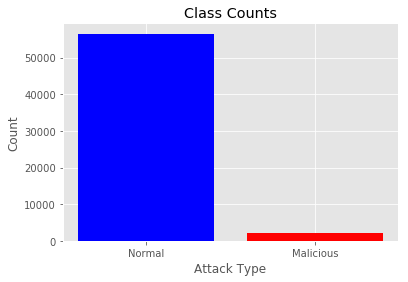

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

count_1 = sum(y == True)
count_0 = sum(y == False)

ax = plt.subplot()
ax.bar([0,1], height=[count_0,count_1], color=['blue','red'])
plt.title("Class Counts")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.xticks([0,1])
ax.set_xticklabels(["Normal", "Malicious"])

#=== Fill in code below========
print('Number of instances in each class:',' 0:',count_0,' 1:',count_1)

<a id="kdd_eval"></a>
<a href="#top">Back to Top</a>
## KDDCup Evaluation and Cross Validation

(0.9888079019073569, 1.0)

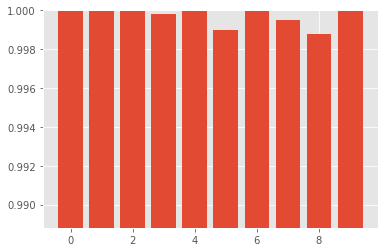

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression

# select model
clf = LogisticRegression()
#select cross validation
cv = KFold(n_splits=10)
# select evaluation criteria
my_scorer = make_scorer(accuracy_score)
# run model training and cross validation
per_fold_eval_criteria = cross_val_score(estimator=clf,
                                    X=X,
                                    y=y,
                                    cv=cv,
                                    scoring=my_scorer
                                   )
plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])

____
**Question 2** Is the code above a proper separation of training and testing sets for the given dataset? Why or why not?



*Enter you answer here (double click)*

*Yes or No and why*

No. KFold uses consecutive folds to split up the data. This data will only be representative of the population if the malicious attacks are uniformly distributed through the data set. It is possible that attacks are some what evenly distributed through normal network traffic, but it would be more appropriate to use a stratified sampling method to guarantee that the individual folds are representative of the population.

___

**Question 3:** Is the evaluation metric chosen in the above code appropriate for the dataset? Why or Why not?

*Enter you answer here (double click)*

No. Accuracy is not a good evaluation metric. Because of the large class imbalance, if a classifier always decided that traffic was normal, it would achieve an accuracy score of 96%. This means that malicious traffic would always be classified as normal, not what DARPA wants. It would be more appropriate to minimize the false negative using recall score.

___

**Exercise 1:** If the code above is not a proper separation of the train or does not use the proper evaluation criteria, fix the code in the block below to use appropriate train/test separation and appropriate evaluation criterion (criteria). 

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

from sklearn.metrics import make_scorer, accuracy_score, recall_score
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
# these imports above might help you

#=====Write your code below here=================
# select model
clf = LogisticRegression()
print(clf.get_params())
#select cross validation
cv = StratifiedKFold(n_splits=10, shuffle=True)
# select evaluation criteria
my_scorer = make_scorer(recall_score)
# run model training and cross validation
per_fold_eval_criteria = cross_val_score(estimator=clf,
                                    X=X,
                                    y=y,
                                    cv=cv,
                                    scoring=my_scorer
                                   )

plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])

clf.get_params()

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': 1, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


NameError: name 'X' is not defined

____
**Question 4**: Does the learning algorithm perform well based on the evaluation criteria? Why or why not?


*Enter you answer here (double click)*

Based on recall, this classifer performs well. However, 2% of network traffic would still need to be analyzed using the original method of having workers analyze individual access attempts by hand. In addition, any false positives identified by this classifier would also need to be analyzed by a person, so each FP increases the work load on analysts.


___


<a id="data_snooping"></a>
<a href="#top">Back to Top</a>

## More Cross Validation

**Exercise 2:** Does the code below contain any errors in the implementation of the cross validation? If so, fix the code below.  

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


#======If there are errors, fix them below======
# n_components = 1
# pca = PCA(n_components=n_components)
# Xpca = pca.fit_transform(X)

# clf = Pipeline([('scl',StandardScaler()),
#                 ('clf',LogisticRegression())])

# per_fold_eval_criteria = cross_val_score(estimator=clf,
#                                     X=Xpca,
#                                     y=y,
#                                     cv=cv,
#                                     scoring=my_scorer
#                                    )

# plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
# plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])

# =====fixed code======
# write the fixed code (if needed) below

clf = Pipeline([('scl',StandardScaler()),
                ('pca',PCA(n_components=1)),
                ('clf',LogisticRegression())])

per_fold_eval_criteria = cross_val_score(estimator=clf,
                                    X=X.astype(np.float),
                                    y=y,
                                    cv=cv,
                                    scoring=my_scorer
                                   )

plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])

NameError: name 'LogisticRegression' is not defined

___
For this question, the circumstances for the DARPA KDD99 cup are changed in the following way:
- When the model for detecting attacks is deployed, we now think that it will often need to be retrained.
- DARPA anticipates that there will be a handful of different style attacks on their systems that have never been seen before. To detect these new attacks, they are employing programmers and analysts to find them manually every day. 
- DARPA believes the perpetrators of these new attacks are more sophisticated, so finding the new attacks will take priority over detecting the older, known attacks. 
- DARPA wants to use your learning algorithm for detecting only these new attacks, but the amount of training and testing data will be extremely small, because the analysts can only identify a handful of new style attacks each day.
- DARPA asks you if you think its a good idea to employ retraining your model each day to find these new attacks.

**Question 5**: How would you change the method of cross validation to answer this question from DARPA? That is, how can you change your cross validation method to better mirror how your system will be used and deployed by DARPA? 

*Enter you answer here (double click)*

We would need to change the number of folds to at most be equal to the number of instances of the new attack type. If we were using stratified 10-fold cross validation and there are only 5 attacks, we would have 5 folds that do not have any instances of the new attack type. We would be over training on normal instances and it would be harder to detect the new attacks.

___

In [32]:
# plotting function for use in next question
# takes input 'test_scores', and an x-axis label
def plot_filled(test_scores,train_x_axis, xlabel=''):
    
    test_mean = np.percentile(test_scores,50, axis=1)
    test_max = np.percentile(test_scores,95, axis=1) 
    test_min = np.percentile(test_scores,5, axis=1) 

    plt.plot(train_x_axis, test_mean,
             color='blue', linestyle='--',
             marker='s', markersize=5,
             label='validation set')

    plt.fill_between(train_x_axis,
                     test_min,
                     test_max,
                     alpha=0.15, color='blue')

    plt.grid(True)
    plt.xlabel(xlabel)
    plt.ylabel('Evaluation Criterion')
    plt.legend(loc='lower right')
    plt.tight_layout()

___
DARPA is also concerned about how much training data they will need from the analysts in order to have a high performing model. They would like to use the current dataset to help answer that question. The code below is written for you to help answer DARPA's question about how many examples will be needed for training. Examine the code and then answer the following question:

**Question 6**: Based on the analysis graphed below, how many positive examples are required to have a good tradeoff between bias and variance for the given evaluation criteria? Why?

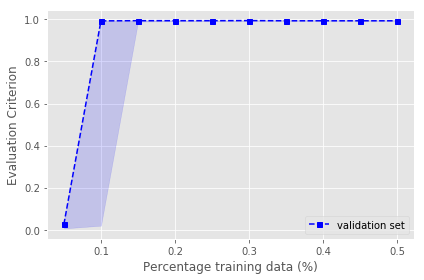

In [33]:
clf = LogisticRegression()

test_scores = []
train_sizes=np.linspace(5e-4,5e-3,10)

for size in train_sizes:
    cv = StratifiedShuffleSplit(n_splits=100,
                                train_size = size,
                                test_size = 1-size,
                               )
    test_scores.append(cross_val_score(estimator=clf,X=X,y=y,cv=cv,scoring=my_scorer))

plot_filled(np.array(test_scores), train_sizes*100, 'Percentage training data (%)')

___
*Enter you answer here (double click)*

It seems that the training data should consist of 0.15% malicious attacks so that we have low bias with enough variance to still catch unseen examples of malicious attacks. After 0.15%, we see that the variance becomes zero, indicating that we have over trained on our examples.
___

___
<a id="stats"></a>
<a href="#top">Back to Top</a>

# Statistical Comparison
Now lets create a few different models and see if any of them have statistically better performances. 

We are creating three different classifiers below to compare to one another. For creating different training and testing splits, we are using stratified shuffle splits on the datasets. 



In [34]:
clf1 = LogisticRegression(C=100)
clf2 = LogisticRegression(C=1)
clf3 = LogisticRegression(C=0.1)

train_size = 0.003 # small training size
cv = StratifiedShuffleSplit(n_splits=10,train_size=train_size,test_size=1-train_size)

evals1 = cross_val_score(estimator=clf1,X=X,y=y,scoring=my_scorer,cv=cv)
evals2 = cross_val_score(estimator=clf2,X=X,y=y,scoring=my_scorer,cv=cv)
evals3 = cross_val_score(estimator=clf3,X=X,y=y,scoring=my_scorer,cv=cv)

**Question 7**: Given the code above, what statistical test is more appropriate for selecting confidence intervals, and **why**? Your options are:
- **A**: approximating the evaluation criterion as a binomial distribution and bounding by the variance (the first option we used in the flipped lecture video)
- **B**: approximating the bounds using the folds of the cross validation to get mean and variance (the second option we used in the flipped lecture video)
- **C**: Either are acceptable statistical tests for obtaining confidence intervals

*Enter you answer here (double click)*

I think that option B is the appropriate statistical comparison method because the data sets are not independent. We are evaluating all of the models on the same data set. Bounding the variance on a binomial distribution only works if the data sets are independent.

___

___
**Final Exercise:** With 95% confidence, perform the statistical test that you selected above. Is any model or set of models statistically the best performer(s)? Or can we not say if the models are different with greater than 95% confidence?

If you chose option A, use a multiplier of Z=1.96. The number of instances used in testing can be calculated from the variable `train_size`.

If you chose option B, use a multiplier of t=2.26 and k=10.

In [38]:
#===================================================
# Enter your code below

from scipy.stats import ttest_rel

print("1 v 2:",ttest_rel(evals1, evals2))
print("2 v 3:",ttest_rel(evals2, evals3))
print("1 v 3:",ttest_rel(evals1, evals3))



print('Model 3 has statistically the best C value with 95% confidence')
#===================================================

1 v 2: Ttest_relResult(statistic=3.3786231425867643, pvalue=0.008144748782008911)
2 v 3: Ttest_relResult(statistic=387.67824311971145, pvalue=2.5734846712585097e-20)
1 v 3: Ttest_relResult(statistic=335.51566539503477, pvalue=9.4474275880663276e-20)
Model 3 has statistically the best C value with 95% confidence


________________________________________________________________________________________________________

That's all! Please **save (make sure you saved!!!) and upload your rendered notebook** and please include **team member names** in the notebook submission.